In [1]:
                                                                                                                                                                                                                        # Let's take a look at Data Reduction and Science Data
# TTE data analysis for any brightest pic by taking 5 sec data
from gbm.data import TTE

/home/lonewolf/mambaforge/lib/python3.10/site-packages/gbm/plot/lal_post_subs.py:184: UserWarning: Basemap not installed. Some functionality not available.
  warnings.warn('Basemap not installed. Some functionality not available.')


In [2]:
tte_n1 = TTE.open('glg_tte_n2_bn220921462_v00.fit')

In [3]:
# To display the lightcurve, we have to bin the data
# Import files useful for unbinned data
# Bin By Time will bin the data up by specified time resolution
# & A time reference point from which we have to begin the binning
from gbm.binning.unbinned import bin_by_time

In [4]:
# Convert tte data to pha data
# Time resolution of 1 s and reference time of 0.0 i.e. referenced to Trig Time
phaii_n1 = tte_n1.to_phaii(bin_by_time, 1.0, time_ref = 0.0)

In [5]:
# Plotting Lightcurve
lc_n1 = phaii_n1.to_lightcurve(time_range = (-100.0, 100.0), energy_range = (8.0, 900.0))

In [6]:
from gbm.plot import Lightcurve, Spectrum
import matplotlib.pyplot as plt

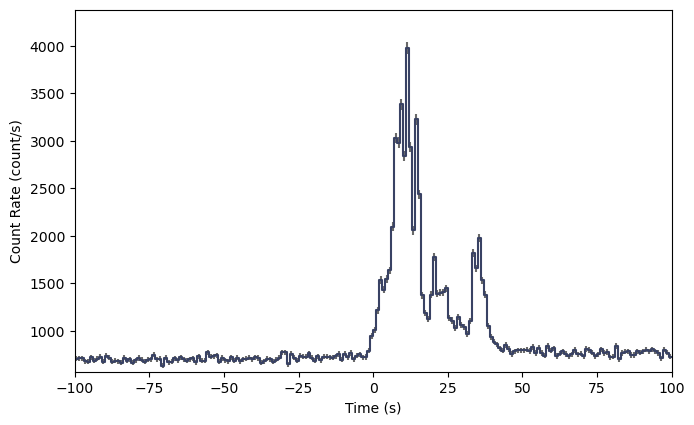

In [7]:
# Lightcurve plot
# Lightcurve from the TTE data bins to 1 s resolution
lcplot = Lightcurve(data = lc_n1)
plt.show()

In [8]:
# Plotting Spectrum
spec_n1 = phaii_n1.to_spectrum(time_range = (5.0, 10.0))

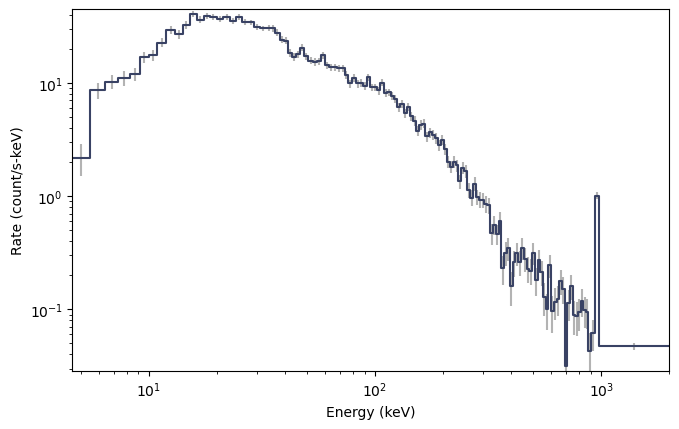

In [9]:
specplot = Spectrum(data = spec_n1)
plt.show()

In [10]:
# Fitting background for our Lightcurve
# Using Background Fitter and Polynomial Background Model
from gbm.background import BackgroundFitter
from gbm.background.binned import Polynomial

In [11]:
# Fitter will operate in both unbinned and binned data
# Using Fitter for the prebinned data
backfitter_n1 = BackgroundFitter.from_phaii(phaii_n1, Polynomial, [(-30.0, -2.0), (50.0, 100.0)])

In [12]:
# Using I order Polynomial
backfitter_n1.fit(order=1)

In [13]:
# Interpolate the background model over the source region
# Plotting the background model on the lightcurve
bkgd_model_n1 = backfitter_n1.interpolate_bins(lc_n1.lo_edges, lc_n1.hi_edges)

In [14]:
# Integrating the Background model over the same Energy range used in the Lightcurve
lc_bkgd_n1 = bkgd_model_n1.integrate_energy(8.0, 900.0)

# Adding background model to Spectrum plot
spec_bkgd_n1 = bkgd_model_n1.integrate_time(5.0, 10.0)

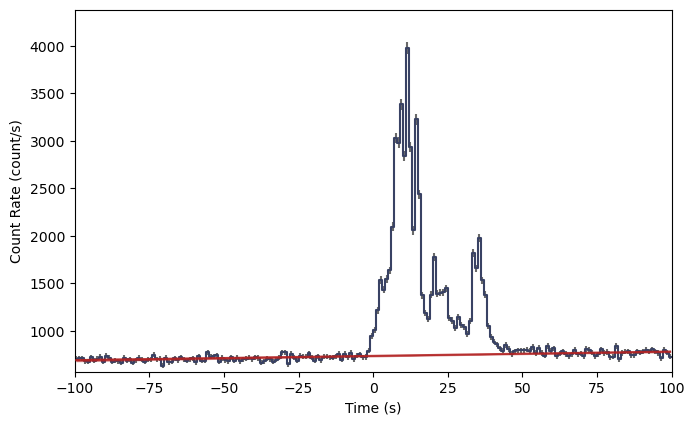

In [15]:
# Adding background model to lightcurve plot
lcplot_n1 = Lightcurve(data = lc_n1, background = lc_bkgd_n1)
lcplot.add_selection(lc_n1.slice(5.0, 10.0))
plt.show()

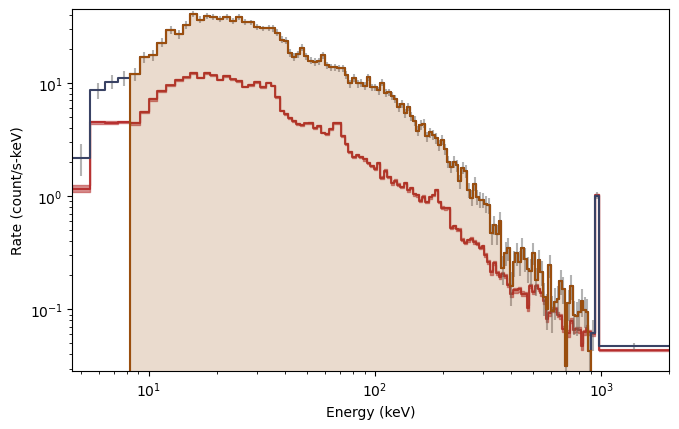

In [16]:
specplot_n1 = Spectrum(data = spec_n1, background = spec_bkgd_n1)
specplot_n1.add_selection(spec_n1.slice(9.0, 900.0))

In [17]:
#Performing Spectral Analysis for the Time Range = 5.0 to 10.0 s and Energy Range = 8.0 to 900.0 MeV

In [18]:
# Creating pha and back object
pha_n1 = phaii_n1.to_pha(time_ranges = [(5.0, 10.0)], energy_range = (8.0, 90.0))

In [19]:
# Creating background object
bak_n1 = bkgd_model_n1.to_bak(time_range = (5.0, 10.0))

In [20]:
# Writing bak file to current directory
bak_n1.write('.')

In [25]:
# Write pha file to current directory and naming bak file
pha_n1.write('.', backfile = bak_n1.filename)

OSError: File ./glg_cspec_n2_bn220921462_v00.pha already exists. If you mean to replace it then use the argument "overwrite=True".

In [26]:
# Reading bak file and pha file into the memory
from gbm.data import PHA, BAK, RSP

In [27]:
pha_b0 = PHA.open('glg_ctime_b0_bn220921462_v00.pha')

KeyError: "Keyword 'EXPOSURE' not found."

In [28]:
bak_b0 = BAK.open('glg_ctime_b0_bn220921462_v00.bak')

OSError: File glg_ctime_b0_bn220921462_v00.bak does not exist

In [29]:
# Spetral Fitting
rsp_b0 = RSP.open('glg_cspec_b0_bn211211549_v02.rsp2')
rsp_n1 = RSP.open('glg_cspec_n1_bn211211549_v02.rsp2')

OSError: File glg_cspec_b0_bn211211549_v02.rsp2 does not exist

In [ ]:
# Interpolate the response at the centre of the count spectrum
rsp_b0 = rsp_b0.interpolate(pha_b0.tcent)
rsp_n1 = rsp_n1.interpolate(pha_n1.tcent)

In [ ]:
from gbm.spectra.fitting import SpectralFitterPgstat

In [ ]:
# Initialize the spectral fitter by giving the list of phas, background spectra and our responses
# Using method (TNC) Truncated Newton Algorithm for minimization 
specfitter = SpectralFitterPgstat([pha_b0, pha_n1], [bak_b0.data, bak_n1.data], [rsp_b0, rsp_n1], method = 'TNC')

In [ ]:
# Import Spectral Function: back function and Powerlaw
from gbm.spectra.functions import Band, PowerLaw

In [ ]:
# once a function is defined then using that function, we can look at its parameter list
band_func = Band()
band_func.param_list

In [ ]:
# Checking default values or start or initialization points for each fitting
band_func.default_values

In [ ]:
# Upper and Lower allowed bounds for each parameters can be checked using band func
# Ability to add function to one another
band_pl_func = Band() + PowerLaw()

In [ ]:
# Checking parameter list
band_pl_func.param_list

In [ ]:
# Fitting using band function
specfitter.fit(band_func, options = ('maxiter':500))

In [ ]:
# Check if the fitter has converged or not
specfitter.message

In [ ]:
# Fits statistics and Degrees of Freedom
specfitter.statistic, specfitter.dof

In [ ]:
# Best fit parameters or Parameter error: Symmetric or Assymmetric
specfitter.parameters

In [ ]:
from gbm.plot import ModelFit

In [ ]:
modelplot = ModelFit(fitter = specfitter)

In [ ]:
# Retrying our fit using Band + Powerlaw function since the residual fit is not good as it is off-axis
specfitter.fit(band_pl_func, options = ('maxiter': 1000))

In [ ]:
# Check if it is converged or not
specfitter.message

In [ ]:
# Updating the plot if it is converged
modelplot.set_fit(specfitter, resid = True)

In [ ]:
# Checking the fit statistics
specfitter.statistics

In [ ]:
# Changing the view of the model plot by changing it to nufnu
modelplot.nufnu_spectrum(num_samples = 1000)

In [ ]:
# Inserting the values to y and x axis
modelplot.ylim = (100.0, 1e4)
modelplot.ax.grid(which = 'both')